In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'brain-tumor-1:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F5767677%2F9481934%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240926%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240926T002613Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D8e824abc1772d80d130570070be9924ecee7a56dd31f963bc2193378e16ea0fa00e23f63b2d7076e091f31dbc9962eaf479ccf7f5e052e2ea2db60583ea45b2a17938397092258f586d987ab3e4f149aed471af0df4948f1cde827062d858833fa0518a63709ba3735427f0c289bbe4d0c87bb60f4405fe2ee0db53eed2ef86de9ee027c47cc0acd71ecbc05f31b5f66cc6f702448906d72a42509c7f2b68f3b36f539ea63334a8a7eb204ad24926bd22d9e1715357d30d1577d9cc18e5ab1c0cb1e3b4774942de3085681e93e86c82eec5eb448d5a22796ca64324f2fc9082d39516bcc7098ed0e6a61fda0c33433b780c0b894f0b48e24c9939e28f946f033'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/brain-tumor-1/Brain_Tumor_DataSet'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brain-tumor-1/Brain_Tumor_DataSet/Training/no_tumor/image(84).jpg
/kaggle/input/brain-tumor-1/Brain_Tumor_DataSet/Training/no_tumor/image(44).jpg
/kaggle/input/brain-tumor-1/Brain_Tumor_DataSet/Training/no_tumor/image(245).jpg
/kaggle/input/brain-tumor-1/Brain_Tumor_DataSet/Training/no_tumor/6.jpg
/kaggle/input/brain-tumor-1/Brain_Tumor_DataSet/Training/no_tumor/image(238).jpg
/kaggle/input/brain-tumor-1/Brain_Tumor_DataSet/Training/no_tumor/image(196).jpg
/kaggle/input/brain-tumor-1/Brain_Tumor_DataSet/Training/no_tumor/image(108).jpg
/kaggle/input/brain-tumor-1/Brain_Tumor_DataSet/Training/no_tumor/image(310).jpg
/kaggle/input/brain-tumor-1/Brain_Tumor_DataSet/Training/no_tumor/image (5).jpg
/kaggle/input/brain-tumor-1/Brain_Tumor_DataSet/Training/no_tumor/image(186).jpg
/kaggle/input/brain-tumor-1/Brain_Tumor_DataSet/Training/no_tumor/image(29).jpg
/kaggle/input/brain-tumor-1/Brain_Tumor_DataSet/Training/no_tumor/image(140).jpg
/kaggle/input/brain-tumor-1/Brain_Tumor_D

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score

In [ ]:
import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf

# Paths


In [ ]:
X_train = []
Y_train = []
image_size = 150
labels = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']
for i in labels:
    folderPath = os.path.join('/kaggle/input/brain-tumor-1/Brain_Tumor_DataSet/Training', i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)
for i in labels:
    folderPath = os.path.join('/kaggle/input/brain-tumor-1/Brain_Tumor_DataSet/Testing', i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)
X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [ ]:
X_train, Y_train = shuffle(X_train,Y_train, random_state= 101)
X_train.shape


(3264, 150, 150, 3)

In [ ]:
Y_train.shape

(3264,)

# Train Test Split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_train,Y_train,test_size = 0.1,random_state=101)

In [ ]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))

y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))

y_test = y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

# CNN

In [ ]:
model = Sequential()
model.add(Conv2D(32,(3,3), activation= 'relu',input_shape=(150,150,3)))
model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(64,(3,3), activation='relu'))
model.add(Conv2D(64,(3,3), activation='relu'))
model.add(Dropout (0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout (0.3))

model.add(Conv2D(128,(3,3), activation='relu'))
model.add(Conv2D(128,(3,3), activation='relu'))
model.add(Conv2D(128,(3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout (0.3))

model.add(Conv2D(128,(3,3), activation='relu'))
model.add(Conv2D(256,(3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout (0.3))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dropout (0.3))
model.add(Dense(4, activation='softmax'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 146, 146, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 73, 73, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 73, 73, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 71, 71, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 69, 69, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 69, 69, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 34, 34, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 34, 34, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 30, 30, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 10, 10, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,277,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,447,044 (16.96 MB)

 Trainable params: 4,447,044 (16.96 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='Adam',metrics=['accuracy'])

In [ ]:
keras.config.disable_traceback_filtering()
history= model.fit(X_train,y_train,epochs=20, validation_split=0.1)
#history= model.fit(X_train , Y_train, validation_data=X_test, epochs=20)

Epoch 1/20


I0000 00:00:1727305836.659785     101 service.cc:145] XLA service 0x7f0414004890 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1727305836.659853     101 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


 3/83 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.2031 - loss: 21.4260  

I0000 00:00:1727305853.106171     101 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


83/83 ━━━━━━━━━━━━━━━━━━━━ 39s 234ms/step - accuracy: 0.2771 - loss: 4.5538 - val_accuracy: 0.4320 - val_loss: 1.3299
Epoch 2/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.4225 - loss: 1.2277 - val_accuracy: 0.5748 - val_loss: 1.0674
Epoch 3/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.5356 - loss: 0.9885 - val_accuracy: 0.6259 - val_loss: 0.9446
Epoch 4/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.6028 - loss: 0.8933 - val_accuracy: 0.6497 - val_loss: 0.7265
Epoch 5/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.6765 - loss: 0.7506 - val_accuracy: 0.5918 - val_loss: 0.8100
Epoch 6/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.7074 - loss: 0.7080 - val_accuracy: 0.6769 - val_loss: 0.6604
Epoch 7/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.7638 - loss: 0.6120 - val_accuracy: 0.6667 - val_loss: 0.7232
Epoch 8/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.7746 - loss: 0.5497 - val_accuracy: 0.7245 - val_loss: 

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

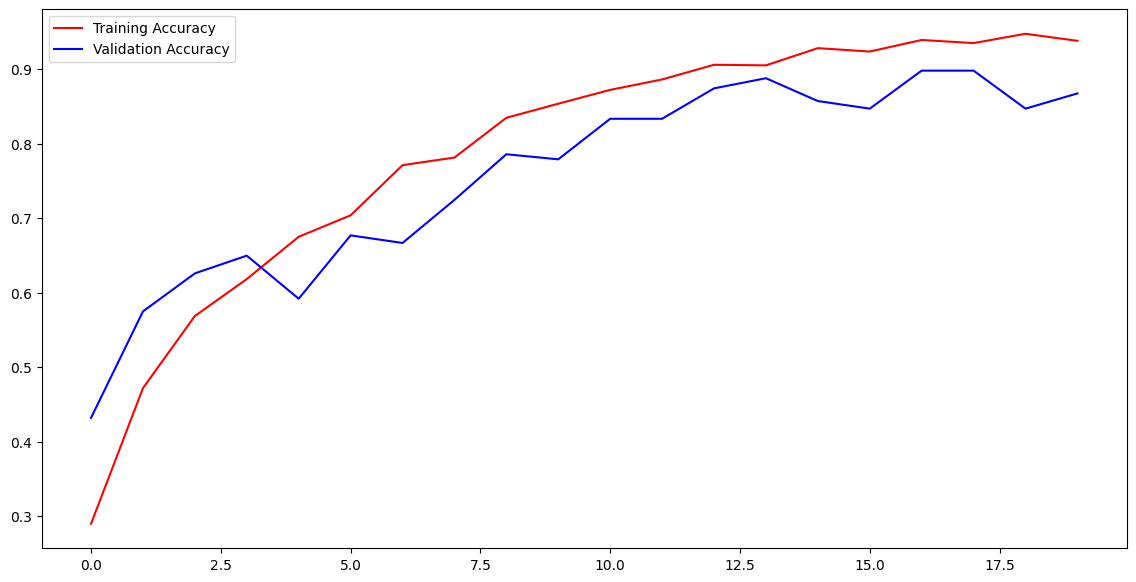

In [ ]:
model.save('braintumor.h5')

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label='Training Accuracy')
plt.plot(epochs,val_acc,'b',label='Validation Accuracy')
plt.legend(loc='upper left')
plt.show()

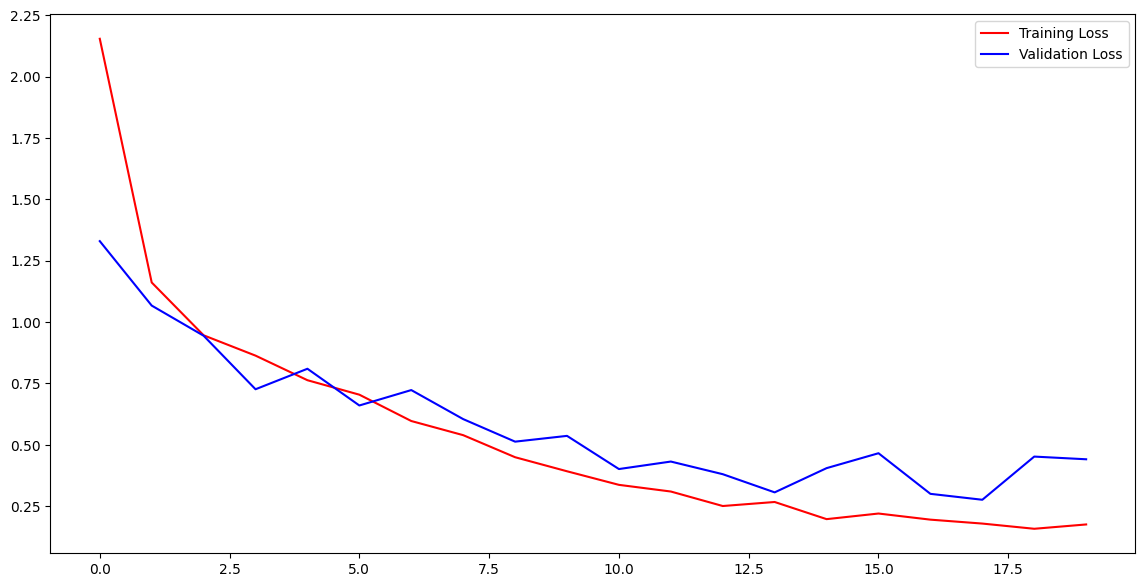

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label='Training Loss')
plt.plot(epochs,val_loss,'b',label='Validation Loss')
plt.legend(loc='upper right')
plt.show()

# Prediction

In [ ]:
img = cv2.imread('/kaggle/input/brain-tumor-1/Brain_Tumor_DataSet/Training/pituitary_tumor/p (107).jpg')
img = cv2.resize(img, (150,150))
img_array = np.array(img)
img_array.shape

(150, 150, 3)

In [ ]:
img_array = img_array.reshape(1,150,150,3)
img_array.shape

(1, 150, 150, 3)

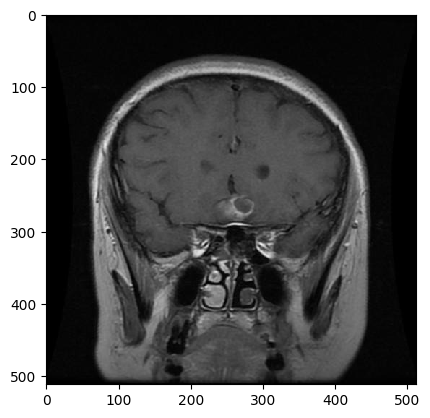

In [ ]:
from tensorflow.keras.preprocessing import image
img = image.load_img('/kaggle/input/brain-tumor-1/Brain_Tumor_DataSet/Training/pituitary_tumor/p (107).jpg')
plt.imshow(img, interpolation='nearest')
plt.show()

In [ ]:
a = model.predict(img_array)
indices = a.argmax()
labels[indices]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 934ms/step


'pituitary_tumor'